# **Simple Linear Regression **

Simple Linear Regression (or SLR) is the simplest model in machine learning. It models the linear relationship between the independent and dependent variables.

**Project overview**

In this project, I build a Simple Linear Regression model to study the linear relationship between TV and Sales

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import the data
from google.colab import files
rawdata = files.upload()


Saving tvmarketing.csv to tvmarketing.csv


In [4]:
# Converting rawdata data into dataframe
df = pd.read_csv("tvmarketing.csv")
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


**Exploratory data analysis**

First, I import the dataset into the dataframe with the standard read_csv () function of pandas library and assign it to the df variable. Then, I conducted exploratory data analysis to get a feel for the data.

In [5]:
# View the top 5 rows of df
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [ ]:
# View the last 5 rows of df
df.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [ ]:
# View the column names
df.columns

Index(['TV', 'Sales'], dtype='object')

In [ ]:
# View the dimensions of df
df.shape

(200, 2)

In [6]:
# View dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [ ]:
# View descriptive statistics
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [ ]:
#checking null values
df.isnull().sum()

TV       0
Sales    0
dtype: int64

**Extraction of dependent and independent variables**

In [8]:
x = df.iloc[:,0:-1].values
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [9]:
y = df.iloc[:,1].values
y

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

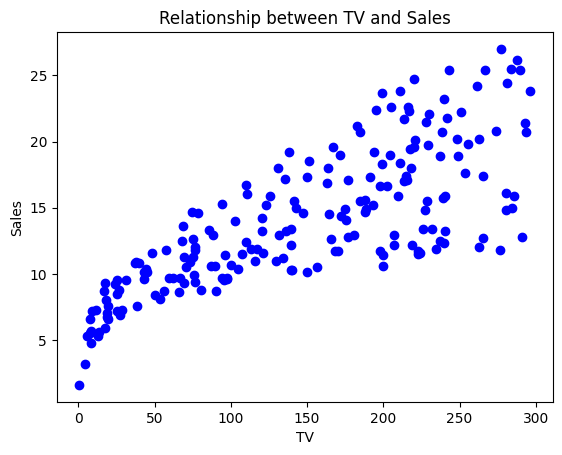

In [18]:
# Plot scatter plot between X and y

plt.scatter(x, y, color = 'blue', label='Scatter Plot')
plt.title('Relationship between TV and Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=1/3,random_state=0)

In [11]:
x_test,x_train,y_test,y_train

(array([[163.5],
        [100.4],
        [ 76.3],
        [184.9],
        [134.3],
        [273.7],
        [296.4],
        [ 96.2],
        [109.8],
        [255.4],
        [204.1],
        [240.1],
        [193.7],
        [191.1],
        [ 89.7],
        [ 43. ],
        [ 38.2],
        [ 13.1],
        [239.3],
        [ 17.2],
        [210.7],
        [ 25.6],
        [177. ],
        [206.9],
        [ 66.1],
        [149.7],
        [129.4],
        [ 94.2],
        [276.7],
        [276.9],
        [  7.8],
        [250.9],
        [175.7],
        [ 11.7],
        [ 75.5],
        [199.8],
        [230.1],
        [107.4],
        [225.8],
        [163.3],
        [131.1],
        [206.8],
        [177. ],
        [216.8],
        [ 66.9],
        [227.2],
        [193.2],
        [ 97.5],
        [ 85.7],
        [228.3],
        [139.5],
        [ 48.3],
        [218.4],
        [195.4],
        [  5.4],
        [238.2],
        [216.4],
        [222.4],
        [ 27.5

In [12]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
# Predicting the Test set results
y_predict = lr.predict(x_test)
y1_predict = lr.predict(x_train)


In [14]:
y_predict


array([14.65304753, 11.59409984, 10.42578543, 15.69047194, 13.23749646,
       19.99529849, 21.09574401, 11.39049318, 12.04979094, 19.10815518,
       16.62124525, 18.3664452 , 16.11707638, 15.99103416, 11.07538763,
        8.81147547,  8.57878215,  7.36198996, 18.32766298,  7.56074884,
       16.94119858,  7.96796216, 15.30749751, 16.75698303,  9.93131211,
       13.98405422, 12.99995535, 11.29353762, 20.14073182, 20.15042737,
        7.10505774, 18.89000519, 15.2444764 ,  7.29412107, 10.38700321,
       16.41279081, 17.88166744, 11.93344427, 17.673213  , 14.64335197,
       13.08236757, 16.75213525, 15.30749751, 17.23691301,  9.97009433,
       17.74108189, 16.09283749, 11.45351429, 10.88147652, 17.79440744,
       13.4895809 ,  9.06840769, 17.31447745, 16.1994886 ,  6.98871108,
       18.27433743, 17.2175219 , 17.50838856,  8.06006994, 14.07131421,
       13.47503756, 12.40852648, 20.47522848,  9.51440323, 18.23555521,
       17.07693635,  7.63831328,  6.92568997, 14.70152531, 11.27

In [15]:
y1_predict

array([10.08159321,  9.15081991, 11.10932207, 20.77094291, 14.97784863,
        9.45138212,  7.14868774, 18.3664452 ,  7.88070216, 16.30613971,
       19.39417406, 10.95419319, 14.31855087, 15.8310575 , 10.4306332 ,
       12.55395981, 19.6026285 ,  6.76086553, 10.34822098, 17.07208857,
       20.66913958, 13.52836312, 15.21538974, 13.11145424,  9.32049212,
       12.69454536, 14.75485086, 16.66487525, 17.585953  ,  7.94372327,
       10.01372433, 16.36916081, 20.33464293, 18.44400965,  7.36683773,
        7.63346551,  9.61620656, 15.49171306, 10.04281099,  7.9388755 ,
        8.51576104,  8.25398104, 13.65440534, 16.88787302, 17.16904413,
       11.70559872,  7.14383996,  7.54620551, 12.82058758, 11.7977065 ,
       12.04979094, 17.85258077, 19.03059074, 15.69047194,  8.89388769,
        9.74709656, 20.9260718 , 15.08934752, 16.54368081,  7.08081885,
       19.58323739, 16.30613971, 17.31932523, 13.86770755, 15.03117419,
       17.28054301, 19.46204295])

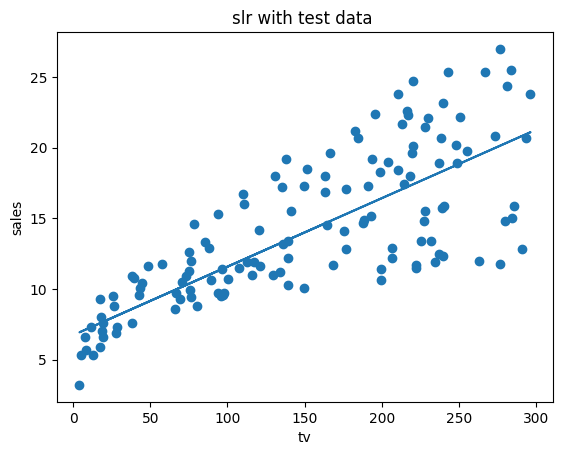

In [16]:
# Visualising the Test set results
plt.title("slr with test data ")
plt.xlabel("tv")
plt.ylabel("sales")
plt.scatter(x_test,y_test)
plt.plot(x_test,lr.predict(x_test))
plt.show()

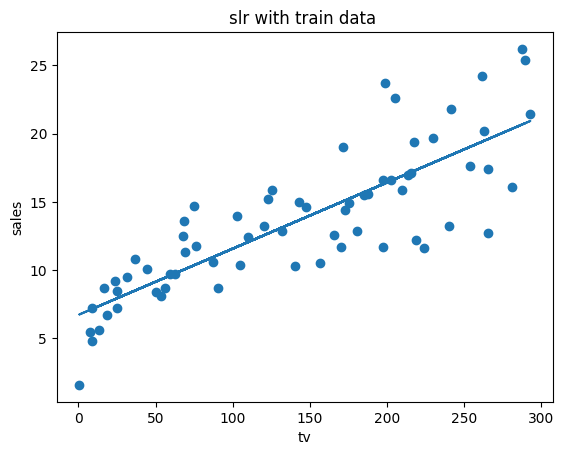

In [17]:
# Visualising the Training set results
plt.title("slr with train data ")
plt.xlabel("tv")
plt.ylabel("sales")
plt.scatter(x_train,y_train)
plt.plot(x_train,lr.predict(x_train))
plt.show()

**Regression metrics for model performance**

Now, it is the time to evaluate model performance.

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
MAE = mean_absolute_error(y_test, y_predict)
print("MAE =",MAE)

MAE = 2.7203526459459635


In [26]:
MSE = mean_squared_error(y_test, y_predict)
print("MSE =",MSE)

MSE = 11.671248930622403


In [27]:
print("RMSE =",np.sqrt(MSE))

RMSE = 3.4163209642278054


In [30]:
r2_score = r2_score(y_test, y_predict)
print("r2_score =",r2_score)

r2_score = 0.5723265816296301
